In [54]:
__author__="William Huanshan Chuang"
__version__="1.0.1"
__email__="wchuang2@mail.sfsu.edu"

#define elementary functions
import math
import statistics
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
def Cartesian_complex_mul(numb1,numb2):
    #numb1 a+bi, [a,b], numb2 c+di, [c,d]
    x=numb1[0]*numb2[0]-numb1[1]*numb2[1]
    y=numb1[0]*numb2[1]+numb1[1]*numb2[0]
    return [x,y]

def Cartesian_complex_scalar_mul(alpha,numb1):
    #numb1 a+bi, [a,b], numb2 c+di, [c,d]
    x=numb1[0]*alpha
    y=numb1[1]*alpha
    return [x,y]

def Cartesian_complex_add(numb1,numb2):
    #numb1 a+bi, [a,b], numb2 c+di, [c,d]
    x=numb1[0]+numb2[0]
    y=numb1[1]+numb2[1]
    return [x,y]

def Cartesian_complex_divide(numb1,numb2):
    #numb1 u+vi, [u,v], numb2 x+yi, [x,y]
    d=numb2[0]*numb2[0]+numb2[1]*numb2[1]
    nx=numb1[0]*numb2[0]+numb1[1]*numb2[1]
    ny=numb1[1]*numb2[0]-numb1[0]*numb2[1]
    X=float(nx/d)
    Y=float(ny/d)
    return[X,Y]

def Cartesian_complex_modulus(numb):
    return math.sqrt(numb[0]*numb[0]+numb[1]*numb[1])

def Cartesian_complex_complex_conjugate(numb):
    return [numb[0],-numb[1]]

def Cartesian_complex_complex_to_polar(numb):
    r=Cartesian_complex_modulus(numb)
    if numb[0]>0:
        t=math.atan(float(numb[1]/numb[0]))
    elif numb[0]<0:
        t=math.atan(float(numb[1]/numb[0]))+math.pi
    else:
        if numb[1]>0:
            t=float(math.pi/2)
        elif numb[1]<0:
            t=float(-math.pi/2)
        else:
            t="null"
    return [r,t]

def Polar_complex_complex_to_Cartesian(numb):
    return [numb[0]*math.cos(numb[1]),numb[0]*math.sin(numb[1])]

def Polar_complex_conjugate(numb):
    return [numb[0],-numb[1]]

def Polar_complex_mul(numb1,numb2):
    #numb1 r_1e^(it_1), [r_1,t_1], numb2 r_2e^(it_2), [r_2,t_2]
    r=numb1[0]*numb2[0]
    t=numb1[1]+numb2[1]
    return [r,t]

def Polar_complex_divide(numb1,numb2):
    #numb1 r_1e^(it_1), [r_1,t_1], numb2 r_2e^(it_2), [r_2,t_2]
    r=float(numb1[0]/numb2[0])
    t=numb1[1]-numb2[1]
    return [r,t]

def Polar_complex_add(numb1,numb2):
    N1=Polar_complex_complex_to_Cartesian(numb1)
    N2=Polar_complex_complex_to_Cartesian(numb2)
    tot=Cartesian_complex_add(N1,N2)
    return Cartesian_complex_complex_to_polar(tot)

def real_matrix_addition(m1,m2):
    #m1=[[M11,M12],[M21,M22]]
    a=m1[0][0]+m2[0][0]
    b=m1[0][1]+m2[0][1]
    c=m1[1][0]+m2[1][0]
    d=m1[1][1]+m2[1][1]
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def Cartesian_complex_matrix_addition(m1,m2):
    #m1=[[M11,M12],[M21,M22]]
    #M11=[a,b]
    a1=m1[0][0][0]+m2[0][0][0]
    a2=m1[0][0][1]+m2[0][0][1]
    b1=m1[0][1][0]+m2[0][1][0]
    b2=m1[0][1][1]+m2[0][1][1]
    c1=m1[1][0][0]+m2[1][0][0]
    c2=m1[1][0][1]+m2[1][0][1]
    d1=m1[1][1][0]+m2[1][1][0]
    d2=m1[1][1][1]+m2[1][1][1]
    a=[a1,a2]
    b=[b1,b2]
    c=[c1,c2]
    d=[d1,d2]
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def real_matrix_multiplication(m1,m2):
    #m1=[[M11,M12],[M21,M22]]
    a=m1[0][0]*m2[0][0]+m1[0][1]*m2[1][0]
    b=m1[0][0]*m2[0][1]+m1[0][1]*m2[1][1]
    c=m1[1][0]*m2[0][0]+m1[1][1]*m2[1][0]
    d=m1[1][0]*m2[0][1]+m1[1][1]*m2[1][1]
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def Cartesian_complex_matrix_multiplication(m1,m2):
    #m1=[[M11,M12],[M21,M22]]
    #M11=[a,b]
    a=Cartesian_complex_add(Cartesian_complex_mul(m1[0][0],m2[0][0]),Cartesian_complex_mul(m1[0][1],m2[1][0])) 
    b=Cartesian_complex_add(Cartesian_complex_mul(m1[0][0],m2[0][1]),Cartesian_complex_mul(m1[0][1],m2[1][1])) 
    c=Cartesian_complex_add(Cartesian_complex_mul(m1[1][0],m2[0][0]),Cartesian_complex_mul(m1[1][1],m2[1][0])) 
    d=Cartesian_complex_add(Cartesian_complex_mul(m1[1][0],m2[0][1]),Cartesian_complex_mul(m1[1][1],m2[1][1])) 
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def real_matrix_inverse(m1):
    #m1=[[M11,M12],[M21,M22]]
    det=m1[0][0]*m1[1][1]-m1[0][1]*m1[1][0]
    a=float(m1[1][1]/det)
    b=float(-m1[0][1]/det)
    c=float(-m1[1][0]/det)
    d=float(m1[0][0]/det)
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def Cartesian_complex_matrix_inverse(m1):
    #m1=[[M11,M12],[M21,M22]]
    #M11=[a,b]
    det=Cartesian_complex_add(Cartesian_complex_mul(m1[0][0],m1[1][1]),Cartesian_complex_scalar_mul(-1,Cartesian_complex_mul(m1[0][1],m1[1][0])))   
    inverse_det=Cartesian_complex_divide([1,0],det)
    a=Cartesian_complex_mul(m1[1][1],inverse_det)
    b=Cartesian_complex_mul(Cartesian_complex_scalar_mul(-1,m1[0][1]),inverse_det) 
    c=Cartesian_complex_mul(Cartesian_complex_scalar_mul(-1,m1[1][0]),inverse_det) 
    d=Cartesian_complex_mul(m1[0][0],inverse_det)
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l


def Cartesian_radial_hyperbolic_distance(z):
    r=float(Cartesian_complex_modulus(z))
    return math.log(float((1+r)/(1-r)))

def operator_T(Lambda):
    D=2
    a1=(-Lambda-float(1/Lambda))*float(-0.5)
    a2=0
    b1=0
    b2=(-Lambda+float(1/Lambda))*float(-0.5)
    c1=0
    c2=(Lambda-float(1/Lambda))*float(-0.5)
    d1=(-Lambda-float(1/Lambda))*float(-0.5)
    d2=0
    l1=[[a1,a2],[b1,b2]]
    l2=[[c1,c2],[d1,d2]]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def operator_R(theta):
    a=Polar_complex_complex_to_Cartesian([1,float(0.5*theta)])
    b=[0,0]
    c=[0,0]
    d=Polar_complex_complex_to_Cartesian([1,float(-0.5*theta)])
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def classification_point(Lambda):
    return [float((2*Lambda**2)/(Lambda**4+1)),float((Lambda**4-1)/(Lambda**4+1))]

def check_T_generate_a_Schottky(Lambda,m):
    t=float(-math.pi/2)+float(math.pi/(2*m))
    K=Polar_complex_complex_to_Cartesian([1,t])
    B=classification_point(Lambda)
    T=operator_T(Lambda)
    T0=Cartesian_complex_divide(T[0][1],T[1][1])
    discriminant=float(Cartesian_complex_modulus(Cartesian_complex_add(K,Cartesian_complex_scalar_mul(-1,T0)))**2)-float(Cartesian_complex_modulus(Cartesian_complex_add(B,Cartesian_complex_scalar_mul(-1,T0)))**2) 
    print(discriminant)
    if discriminant>0:
        return True
    else:
        return False

def Tz(T,z):
    a=T[0][0]
    b=T[0][1]
    c=T[1][0]
    d=T[1][1]
    return  Cartesian_complex_divide(Cartesian_complex_add(Cartesian_complex_mul(a,z),b),Cartesian_complex_add(Cartesian_complex_mul(c,z),d))




#Generate the orbit Gamma(0)
def Gamma0(Lambda,m,N):
    T=operator_T(Lambda)
    theta=float(math.pi/m)
    R=operator_R(theta)
    L=[Tz(T,[0,0])]
    tmp1=[]
    tmp2=[]
    nodes_in_DT=[[0,0]]
    j=1
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Tz(R,z)
                tmp1.append(z)
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Tz(T,[0,0])]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            for k in L:
                z=Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
    return nodes_in_DT
# measuring hyperbolic distance
def Hyperbolic_Distance_Gamma0(Lambda,m,N):
    T=operator_T(Lambda)
    theta=float(math.pi/m)
    R=operator_R(theta)
    L=[Tz(T,[0,0])]
    tmp1=[]
    tmp2=[]
    nodes_in_DT=[[0,0]]
    j=1
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Tz(R,z)
                tmp1.append(z)
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Tz(T,[0,0])]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            for k in L:
                z=Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
    Hyperbolic_distance=[]
    for k in nodes_in_DT:
        Hyperbolic_distance.append(Cartesian_radial_hyperbolic_distance(k))
    return Hyperbolic_distance

# measuring Exp(-hyperbolic distance)
def Exp_negative_Hyperbolic_Distance_Gamma0(Lambda,m,N):
    T=operator_T(Lambda)
    theta=float(math.pi/m)
    R=operator_R(theta)
    L=[Tz(T,[0,0])]
    tmp1=[]
    tmp2=[]
    nodes_in_DT=[[0,0]]
    j=1
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Tz(R,z)
                tmp1.append(z)
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Tz(T,[0,0])]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            for k in L:
                z=Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
    Hyperbolic_distance=[]
    for k in nodes_in_DT:
        Hyperbolic_distance.append(math.exp(-Cartesian_radial_hyperbolic_distance(k)))
    return Hyperbolic_distance

# measuring Exp(-hyperbolic distance)
def Exp_negative_Hyperbolic_Distance_Gamma0_with_t(Lambda,m,N,t):
    T=operator_T(Lambda)
    theta=float(math.pi/m)
    R=operator_R(theta)
    L=[Tz(T,[0,0])]
    tmp1=[]
    tmp2=[]
    nodes_in_DT=[[0,0]]
    j=1
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Tz(R,z)
                tmp1.append(z)
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Tz(T,[0,0])]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            for k in L:
                z=Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
    Hyperbolic_distance=[]
    for k in nodes_in_DT:
        Hyperbolic_distance.append(math.exp(-t*Cartesian_radial_hyperbolic_distance(k)))
    return Hyperbolic_distance

# measuring Exp(-t*(hyperbolic distance))
def Improved_Exp_negative_Hyperbolic_Distance_Gamma0_with_t(Lambda,m,N,L,t):

    T=operator_T(Lambda)
    theta=float(math.pi/m)
    R=operator_R(theta)
    if len(L)==0:
        L=[Tz(T,[0,0])]
        j=1
    else:
        j=N
    tmp1=[]
    tmp2=[]
    nodes_in_DT=[[0,0]]
    
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Tz(R,z)
                tmp1.append(z)
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Tz(T,[0,0])]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            for k in L:
                z=Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
    Hyperbolic_distance=[]
    for k in nodes_in_DT:
        Hyperbolic_distance.append(math.exp(-t*Cartesian_radial_hyperbolic_distance(k)))
    return [Hyperbolic_distance,L]

# measuring Exp(-hyperbolic distance)
def Improved_Exp_negative_Hyperbolic_Distance_Gamma0(Lambda,m,N,L):

    T=operator_T(Lambda)
    theta=float(math.pi/m)
    R=operator_R(theta)
    if len(L)==0:
        L=[Tz(T,[0,0])]
        j=1
    else:
        j=N
    tmp1=[]
    tmp2=[]
    nodes_in_DT=[[0,0]]
    
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Tz(R,z)
                tmp1.append(z)
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Tz(T,[0,0])]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            for k in L:
                z=Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
    Hyperbolic_distance=[]
    for k in nodes_in_DT:
        Hyperbolic_distance.append(math.exp(-Cartesian_radial_hyperbolic_distance(k)))
    return [Hyperbolic_distance,L]



      

# measuring hyperbolic distance
def Gamma(Lambda,m,N):
    
    T=operator_T(Lambda) # T is a 2 by 2 matrix.
    theta=float(math.pi/m)
    ID=[[[1, 0], [0, 0]], [[0, 0], [1, 0]]]
    R=operator_R(theta) # R is a 2 by 2 matrix.
    L=[T]
    tmp1=[]
    tmp2=[]
    model=[]
    component=[]
    
    nodes_in_DT=[ [[[1, 0], [0, 0]], [[0, 0], [1, 0]]]  ]
    j=1
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Cartesian_complex_matrix_multiplication(R,z)   #Tz(R,z)
                tmp1.append(z)
                
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Cartesian_complex_matrix_multiplication(T,ID)]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            
            for k in L:
                z=Cartesian_complex_matrix_multiplication(T,k)       #Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
                
            
            
            
                    
            
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Cartesian_complex_matrix_multiplication(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Cartesian_complex_matrix_multiplication(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
        Out=[]  
    index=0
    temp0=[]
    tmp1=[]
    for k in L:
        z=Cartesian_complex_matrix_multiplication(T,k)       #Tz(T,k)
        tmp1.append(z)   
    N=int(math.log(len(tmp1),(2*m-1)))
    print("N:"+str(N))
    initial_index=(((2*m)-1)**(N-1))*(m+1)
    tindex=initial_index
    #print(len(tmp1))
    cindex=0
    counter=0
    for k in tmp1:
        
        if counter==(2*m-1):
            counter=0
            cindex+=1
            
        temp=[]
        component=[]
        component.append(initial_index)
        component.append(cindex)
        initial_index+=1
        initial_index=initial_index%((2*m)*(2*m-1)**(N-1))
        temp.append(k)
        temp.append(component)
        temp0.append(temp)
        counter+=1
    model.append(temp0) 
    initial_index=tindex+(2*m-1)**(N-1)
    initial_index=initial_index%((2*m)*(2*m-1)**(N-1))
    tindex+=1
    tindex=tindex%((2*m)*(2*m-1)**(N-1))
    
    
    temp=[]
    temp1=[]
    temp2=[]
    
    
    print("tmp1"+str(len(tmp1)))
    for i in range(2*m-1):
        
        temp2=[]
        for k in tmp1:
            temp=[]
            temp0=[]
            if counter==(2*m-1):
                counter=0
                cindex+=1
            z=Cartesian_complex_matrix_multiplication(R,k)
            temp2.append(z)
            temp.append(z)
            component=[]
            component.append(initial_index)
            component.append(cindex)
            temp.append(component)
            initial_index+=1
            initial_index=initial_index%((2*m)*(2*m-1)**(N-1))
            temp0.append(temp)

            counter+=1
            model.append(temp0)   
        tmp1=[]
        for k in temp2:
            tmp1.append(k)
        temp2=[]
           
        
        initial_index=tindex+(2*m-1)**(N-1)
        initial_index=initial_index%((2*m)*(2*m-1)**(N-1))
        tindex+=1
        tindex=tindex%((2*m)*(2*m-1)**(N-1))
    #for k in model:
    #    tmp1=[]
    #    component=[]
    #    for key in k:
    #            
    #        print("====")
    #        print(key)
    #    print("------")
            
            
    #Hyperbolic_distance=[]
    #for k in nodes_in_DT:
    #    Hyperbolic_distance.append(Cartesian_radial_hyperbolic_distance(k))
    return model


def non_normalized_derivative(T,z):
    a=T[0][0]
    b=T[0][1]
    c=T[1][0]
    d=T[1][1]
    N=Cartesian_complex_add(Cartesian_complex_mul(a,d),Cartesian_complex_scalar_mul(-1,Cartesian_complex_mul(b,c)))
    D=Cartesian_complex_mul(Cartesian_complex_add(Cartesian_complex_mul(c,z),d),Cartesian_complex_add(Cartesian_complex_mul(c,z),d))
    
    if Cartesian_complex_modulus(D)!=0:
        return Cartesian_complex_divide(N,D)
    else:
        return "null"
    
    
def derivatives(model):
    output=[]
    for i in model:
        for j in i:
            tmp=[]
            z=Tz(j[0],[0,-1])
            D_of_T=derivative(j[0],z)
            if D_of_T!="null":
                Tij=float(1/Cartesian_complex_modulus(D_of_T))
            else:
                Tij=0
            tmp.append(Tij)
            tmp.append(j[1])
            output.append(tmp)
    return output
            
# Generate x_j
def Generate_xj(M,x_1):
    #M=number of disks in the first level
    #x_1=[1,0]
    l=[]
    
    k=2
    theta=float(2*math.pi/M)
    mul=Polar_complex_complex_to_Cartesian([1,theta])
    #M=3
    tmp=x_1
    l.append(tmp)
    while k<=M:
        tmp=Cartesian_complex_mul(mul,tmp)
        l.append(tmp)    
        k+=1
    return l
# Compute y_ij
def inverse_f1(R,z,q):
    D=Cartesian_complex_add(z,Cartesian_complex_scalar_mul(-1,q))
    numb2=Cartesian_complex_divide([R**2,0],D)
    return Cartesian_complex_add(Cartesian_complex_complex_conjugate(q),numb2)
def inverse_f2(R,z,q):
    D=Cartesian_complex_add(z,Cartesian_complex_scalar_mul(-1,q))
    numb2=Cartesian_complex_divide([R**2,0],D)
    H2=Cartesian_complex_divide([1,-math.sqrt(3)],[1,math.sqrt(3)])
    H2bar=Cartesian_complex_complex_conjugate(H2)
    return Cartesian_complex_divide(Cartesian_complex_add(Cartesian_complex_complex_conjugate(q),numb2),H2bar)
def inverse_f3(R,z,q):
    D=Cartesian_complex_add(z,Cartesian_complex_scalar_mul(-1,q))
    numb2=Cartesian_complex_divide([R**2,0],D)
    H3=Cartesian_complex_divide([-1,-math.sqrt(3)],[-1,math.sqrt(3)])
    H3bar=Cartesian_complex_complex_conjugate(H3)
    return Cartesian_complex_divide(Cartesian_complex_add(Cartesian_complex_complex_conjugate(q),numb2),H3bar)

def Manually_Symmetric_pairs_of_pants(angle,tinitial,incre):
    Theta=angle#math.pi-angle#0.5*angle
    R=math.tan(Theta/2) #math.sqrt(2-2*math.cos(Theta))
    tmpl=Generate_xj(M=3,x_1=[math.sqrt(1+R**2),0])
    tmp2=Generate_xj(M=3,x_1=[1,0])
    
    t11=0
    t22=0
    t33=0
    a=tmpl[0]
    b=Cartesian_complex_add([R**2,0],Cartesian_complex_scalar_mul(-1,Cartesian_complex_mul(tmpl[0],
    Cartesian_complex_complex_conjugate(tmpl[0]))))
    c=[1,0]
    d=Cartesian_complex_scalar_mul(-1,Cartesian_complex_complex_conjugate(tmpl[0]))
    T=[[a,b],[c,d]]
    y12=Cartesian_complex_divide(Cartesian_complex_add(Cartesian_complex_mul(a,tmp2[1]),b),
                             Cartesian_complex_add(Cartesian_complex_mul(c,tmp2[1]),d))
    #to show it's an inverse function
    #print(y12)
    #print(Cartesian_complex_divide(Cartesian_complex_add(Cartesian_complex_mul(a,y12),b),
    #                         Cartesian_complex_add(Cartesian_complex_mul(c,y12),d)))
    #print(tmp2[1])
    y13=Cartesian_complex_divide(Cartesian_complex_add(Cartesian_complex_mul(a,tmp2[2]),b),
                             Cartesian_complex_add(Cartesian_complex_mul(c,tmp2[2]),d))
    t12=float(1/Cartesian_complex_modulus(non_normalized_derivative([[tmpl[0],b],[[1,0],
        Cartesian_complex_scalar_mul(-1,Cartesian_complex_complex_conjugate(tmpl[0]))]],y12)))
    t13=float(1/Cartesian_complex_modulus(non_normalized_derivative([[tmpl[0],b],[[1,0],
        Cartesian_complex_scalar_mul(-1,Cartesian_complex_complex_conjugate(tmpl[0]))]],y13)))
    H2=Cartesian_complex_divide([1,-math.sqrt(3)],[1,math.sqrt(3)])
    H2bar=Cartesian_complex_complex_conjugate(H2)
    q2=tmpl[1]
    a=Cartesian_complex_mul(q2,H2bar)
    b=Cartesian_complex_add([R**2,0],Cartesian_complex_scalar_mul(-1,Cartesian_complex_mul(tmpl[1],
    Cartesian_complex_complex_conjugate(tmpl[1]))))
    c=H2bar
    d=Cartesian_complex_scalar_mul(-1,Cartesian_complex_complex_conjugate(q2))
    T=[[a,b],[c,d]]
    y21=Cartesian_complex_divide(Cartesian_complex_add(Cartesian_complex_mul(a,tmp2[0]),b),
                             Cartesian_complex_add(Cartesian_complex_mul(c,tmp2[0]),d))
    y23=Cartesian_complex_divide(Cartesian_complex_add(Cartesian_complex_mul(a,tmp2[2]),b),
                             Cartesian_complex_add(Cartesian_complex_mul(c,tmp2[2]),d))
    t21=float(1/Cartesian_complex_modulus(non_normalized_derivative([[a,b],[c,d]],y21)))
    t23=float(1/Cartesian_complex_modulus(non_normalized_derivative([[a,b],[c,d]],y23)))
    H3=Cartesian_complex_divide([-1,-math.sqrt(3)],[-1,math.sqrt(3)])
    H3bar=Cartesian_complex_complex_conjugate(H3)
    q3=tmpl[2]
    a=Cartesian_complex_mul(q3,H3bar)
    b=Cartesian_complex_add([R**2,0],Cartesian_complex_scalar_mul(-1,Cartesian_complex_mul(tmpl[2],
    Cartesian_complex_complex_conjugate(tmpl[2]))))
    c=H3bar
    d=Cartesian_complex_scalar_mul(-1,Cartesian_complex_complex_conjugate(q3))
    T=[[a,b],[c,d]]
    y31=Cartesian_complex_divide(Cartesian_complex_add(Cartesian_complex_mul(a,tmp2[0]),b),
                             Cartesian_complex_add(Cartesian_complex_mul(c,tmp2[0]),d))
    y32=Cartesian_complex_divide(Cartesian_complex_add(Cartesian_complex_mul(a,tmp2[1]),b),
                             Cartesian_complex_add(Cartesian_complex_mul(c,tmp2[1]),d))
    t31=float(1/Cartesian_complex_modulus(non_normalized_derivative([[a,b],[c,d]],y31)))
    t32=float(1/Cartesian_complex_modulus(non_normalized_derivative([[a,b],[c,d]],y32)))
    #print(t11)
    #print(t12)
    #print(t13)
    #print(t21)
    #print(t22)
    #print(t23)
    #print(t31)
    #print(t32)
    #print(t33)
    TIJ=[[t11,t12,t13],[t21,t22,t23],[t31,t32,t33]]
    print(TIJ)
    flag=1
    flag2=0
    while flag==1:
        col=[]
        TIJ_l=[]
        for k in TIJ:
            col=[]
            for i in k:
                val=i**tinitial
                col.append(val)
            TIJ_l.append(col)
        a = np.array(TIJ_l)
        w,v=eig(a)
        M_l=-10000000000
        for k in w:
            if k>M_l:
                M_l=k
        #print(M_l)
        #print("tinitial:"+str(tinitial))
        if M_l>1 and flag2==0:
            flag2=1
        if flag2==1 and M_l<1:
            flag=0
        if M_l<1 and flag2==0:
            flag2=-1
        if flag2==-1 and M_l>1:
            flag=0
        tinitial+=incre
    print("delta:"+str(tinitial))  
    #print("Max eigenvalue:"+str(M_l.real)) 
    return tinitial
def Systematic_Symmetric_pairs_of_pants_first_layer(angle,tinitial,incre):
    z0=[1,0]
    Theta=angle#math.pi-angle#0.5*angle
    R=math.tan(Theta/2) #math.sqrt(2-2*math.cos(Theta))
    tmpl=Generate_xj(M=3,x_1=[math.sqrt(1+R**2),0])
    tmp2=Generate_xj(M=3,x_1=[1,0])
    AB_i=[]
    tmpAB=[]
    for i in range(3):
        if i==0:
            tmpAB.append(Cartesian_complex_mul(z0,Polar_complex_complex_to_Cartesian([1,angle/2])))
            tmpAB.append(Cartesian_complex_mul(z0,Polar_complex_complex_to_Cartesian([1,((2*math.pi)-angle/2)])))
        else:
            tmpAB.append(Cartesian_complex_mul(AB_i[-1][0],Polar_complex_complex_to_Cartesian([1,angle])))
            tmpAB.append(Cartesian_complex_mul(AB_i[-1][1],Polar_complex_complex_to_Cartesian([1,angle])))
        AB_i.append(tmpAB)
        tmpAB=[]
    
    TIJ=[]
    for i in range(3):
        tmpT=[]
        for j in range(3):
            if i==j:
                tmpT.append(0)
            else:
                yij=func_g(AB_i[i][0],AB_i[i][1],tmp2[j])
                tmpT.append(float(1/Cartesian_complex_modulus(func_g_prime(AB_i[i][0],AB_i[i][1],yij))))
        TIJ.append(tmpT)
    #TIJ=[[t00,t01,t02],[t10,t11,t12],[t20,t21,t22]]
    print(TIJ)
    flag=1
    flag2=0
    while flag==1:
        col=[]
        TIJ_l=[]
        for k in TIJ:
            col=[]
            for i in k:
                val=i**tinitial
                col.append(val)
            TIJ_l.append(col)
        a = np.array(TIJ_l)
        w,v=eig(a)
        M_l=-10000000000
        for k in w:
            if k>M_l:
                M_l=k
        #print(M_l)
        #print("tinitial:"+str(tinitial))
        if M_l>1 and flag2==0:
            flag2=1
        if flag2==1 and M_l<1:
            flag=0
        if M_l<1 and flag2==0:
            flag2=-1
        if flag2==-1 and M_l>1:
            flag=0
        tinitial+=incre
    print("delta:"+str(tinitial))  
    #print("Max eigenvalue:"+str(M_l.real)) 
    return tinitial
def func(R, q, z):
    qbar=Cartesian_complex_complex_conjugate(q)
    D=Cartesian_complex_add(z,Cartesian_complex_scalar_mul(-1,qbar))
    return Cartesian_complex_add(Cartesian_complex_divide([R**2,0],D),q)
def angle(phi):
    out=float(phi)
    if abs(out)<0.000000000000001:
        return 0
    while out<0:
        out+=2*math.pi
    return out
def Fz(F,z):
    A=F[0][0]
    B=F[0][1]
    C=F[1][0]
    D=F[1][1]
    N=Cartesian_complex_add(Cartesian_complex_mul(A,z),B)
    DD=Cartesian_complex_add(Cartesian_complex_mul(C,z),D)
    return Cartesian_complex_divide(N,DD)

def radius_finder(A,B):
    M=[(A[0]+B[0])/2,(A[1]+B[1])/2]
    PM=Cartesian_complex_complex_to_polar(M)
    a=Cartesian_complex_complex_to_polar(A)
    phi=abs(PM[1]-a[1])
    if phi<(math.pi/2):
        return math.tan(phi)
    else:
        return math.tan(abs(PM[1]+abs(a[1])))

def new_center_finder(A,B):
    RADIUS=radius_finder(A,B)
    M=[(A[0]+B[0])/2,(A[1]+B[1])/2]
    PM=Cartesian_complex_complex_to_polar(M)
    return Polar_complex_complex_to_Cartesian([math.sqrt(1+RADIUS**2), PM[1]])

def input_finder(A,B):
    M=[(A[0]+B[0])/2,(A[1]+B[1])/2]
    PM=Cartesian_complex_complex_to_polar(M)
    return Polar_complex_complex_to_Cartesian([1, PM[1]])

#ax+by=c
#return [a,b,c]
def symetric_axis(A,B):
    if abs(A[0]-B[0])<0.00001:
        return [0,1,0]
    else:
        return [-(A[1]+B[1])/(A[0]+B[0]),1,0]
def func_h(A,B,z):
    SA=symetric_axis(A,B)
    #print("SA"+str(SA))
    a=[SA[0],0]
    b=[1,0]
    K=Cartesian_complex_scalar_mul(-1,Cartesian_complex_mul([0,1],a))
    N=Cartesian_complex_mul(Cartesian_complex_complex_conjugate(z),Cartesian_complex_add(b,K))
    D=Cartesian_complex_add(b,Cartesian_complex_mul([0,1],a))
    return Cartesian_complex_divide(N,D)
def func_I(A,B,z):
    Radius=radius_finder(A,B)
    #print("Radius"+str(Radius))
    NEW_CENTER=new_center_finder(A,B)
    #print("NEW_CENTER"+str(NEW_CENTER))
    K1=Cartesian_complex_complex_conjugate(Cartesian_complex_add(z,Cartesian_complex_scalar_mul(-1,NEW_CENTER)))
    #print("z"+str(z))
    #print("Cartesian_complex_scalar_mul(-1,NEW_CENTER)"+str(Cartesian_complex_scalar_mul(-1,NEW_CENTER)))
    K2=Cartesian_complex_divide([Radius**2,0],K1)
    return Cartesian_complex_add(K2,NEW_CENTER)
def func_g(A,B,z):
    z=func_h(A,B,z)
    return func_I(A,B,z)

def generator(A,B):
    R=radius_finder(A,B)
    q=new_center_finder(A,B)
    SA=symetric_axis(A,B)
    a=[SA[0],0]
    b=[SA[1],0]
    H=Cartesian_complex_divide(Cartesian_complex_add(b,Cartesian_complex_mul([0,1],Cartesian_complex_scalar_mul(-1,a))),Cartesian_complex_add(b,Cartesian_complex_mul([0,1],a)))
    A=Cartesian_complex_mul(q,Cartesian_complex_complex_conjugate(H))
    #print("A:"+str(A))
    B=Cartesian_complex_add([R**2,0],Cartesian_complex_scalar_mul(-1,Cartesian_complex_mul(q,Cartesian_complex_complex_conjugate(q))))
    #print("B:"+str(B))
    C=Cartesian_complex_complex_conjugate(H)
    #print("C:"+str(C))
    D=Cartesian_complex_scalar_mul(-1,Cartesian_complex_complex_conjugate(q))
    #print("D:"+str(D))
    return [[A,B],[C,D]]
def func_g_prime(A,B,z):
    #print("z:"+str(z))
    R=radius_finder(A,B)
    #print("R:"+str(R))
    q=new_center_finder(A,B)
    SA=symetric_axis(A,B)
    a=[SA[0],0]
    b=[SA[1],0]
    H=Cartesian_complex_divide(Cartesian_complex_add(b,Cartesian_complex_mul([0,1],Cartesian_complex_scalar_mul(-1,a))),Cartesian_complex_add(b,Cartesian_complex_mul([0,1],a)))
    A=Cartesian_complex_mul(q,Cartesian_complex_complex_conjugate(H))
    #print("A:"+str(A))
    B=Cartesian_complex_add([R**2,0],Cartesian_complex_scalar_mul(-1,Cartesian_complex_mul(q,Cartesian_complex_complex_conjugate(q))))
    #print("B:"+str(B))
    C=Cartesian_complex_complex_conjugate(H)
    #print("C:"+str(C))
    D=Cartesian_complex_scalar_mul(-1,Cartesian_complex_complex_conjugate(q))
    #print("D:"+str(D))
    N=Cartesian_complex_add(Cartesian_complex_mul(A,D),Cartesian_complex_scalar_mul(-1,Cartesian_complex_mul(B,C)))
    d=Cartesian_complex_add(Cartesian_complex_mul(C,z),D)
    DD=Cartesian_complex_mul(d,d)
    #print("DD:"+str(DD))
    #print("N:"+str(N))
    #print("Cartesian_complex_modulus(N):"+str(Cartesian_complex_modulus(N)))
    #print("Cartesian_complex_modulus(DD):"+str(Cartesian_complex_modulus(DD)))
    return(Cartesian_complex_divide(N,DD))
def find_delta(TIJ,tinitial,incre):
    flag=1
    flag2=0
    while flag==1:
        col=[]
        TIJ_l=[]
        for k in TIJ:
            col=[]
            for i in k:
                val=i**tinitial
                col.append(val)
            TIJ_l.append(col)
        a = np.array(TIJ_l)
        w,v=eig(a)
        M_l=-10000000000
        for k in w:
            if k>M_l:
                M_l=k
        #print(M_l)
        #print("tinitial:"+str(tinitial))
        if M_l>1 and flag2==0:
            flag2=1
        if flag2==1 and M_l<1:
            flag=0
        if M_l<1 and flag2==0:
            flag2=-1
        if flag2==-1 and M_l>1:
            flag=0
        tinitial+=incre
    print("delta:"+str(tinitial))
    return tinitial
def Check_AB_i_Initial(A, B,INITIAL, j):
    a=Cartesian_complex_complex_to_polar(A)
    b=Cartesian_complex_complex_to_polar(B)
    
    if j==0:
        testpt=input_finder(A,B)
        t=Cartesian_complex_complex_to_polar(testpt)
        aa=Cartesian_complex_complex_to_polar(INITIAL[0][0])
        bb=Cartesian_complex_complex_to_polar(INITIAL[0][1])
        if (t[1]>0 and aa[1]>0 and t[1]<aa[1]) or (t[1]<0 and aa[1]<0 and t[1]>aa[1]):
            #print("a[1]:"+str(a[1]))
            #print("t[1]:"+str(t[1]))
            return False
        if (t[1]>0 and bb[1]>0 and t[1]<bb[1]) or (t[1]<0 and bb[1]<0 and t[1]>bb[1]):
            return False
        else:
            return True
    if j==1:
        if (a[1]>=math.pi/3+0.00000000001 and a[1]<=math.pi-0.00000000001) or (b[1]>=math.pi/3+0.00000000001 and b[1]<=math.pi-0.00000000001):
            return False
        else:
            return True
    if j==2:
        if (a[1]>=-math.pi+0.00000000001 and a[1]<=-math.pi/3-0.00000000001) or (b[1]>=-math.pi+0.00000000001 and b[1]<=-math.pi/3-0.00000000001):
            return False
        elif (a[1]>=math.pi+0.00000000001 and a[1]<=math.pi*5/3-0.00000000001) or (b[1]>=math.pi+0.00000000001 and b[1]<=math.pi*5/3-0.00000000001):
            return False
        else:
            return True

def N_level_Symmetric_pairs_of_pants_Geometric_Method(angle,tinitial,incre,NoL):
    z0=[1,0]
    R=math.tan(angle/2) #math.sqrt(2-2*math.cos(Theta))
    tmpl=Generate_xj(M=3,x_1=[math.sqrt(1+R**2),0])
    tmp2=Generate_xj(M=3,x_1=[1,0])
    k=1
    R=[]
    AB_i=[]
    AB_j=[]
    tmpAB=[]
    DELTA=[]
    INITIAL=[]
    while k<=NoL:
        if k==1:
            #find the first level ABs
            for i in range(3):
                if i==0:
                    tmpAB.append(Cartesian_complex_mul(z0,Polar_complex_complex_to_Cartesian([1,angle/2])))
                    tmpAB.append(Cartesian_complex_mul(z0,Polar_complex_complex_to_Cartesian([1,((2*math.pi)-angle/2)])))
                else:
                    tmpAB.append(Cartesian_complex_mul(AB_i[-1][0],Polar_complex_complex_to_Cartesian([1,angle])))
                    tmpAB.append(Cartesian_complex_mul(AB_i[-1][1],Polar_complex_complex_to_Cartesian([1,angle])))
                AB_i.append(tmpAB)
                tmpAB=[]
                
            #keep the initial
            for ii in AB_i:
                INITIAL.append(ii)
            print(INITIAL)    
            #assemble Tij
            TIJ=[]
            for i in range(len(AB_i)):
                tmpT=[]
                for j in range(len(AB_i)):
                    if i==j:
                        tmpT.append(0)
                    else:
                        yij=func_g(AB_i[i][0],AB_i[i][1],tmp2[j])
                        #tmpT.append(float(1/Cartesian_complex_modulus(func_g_prime(AB_i[i][0],AB_i[i][1],yij))))
                        tmpT.append(float(Cartesian_complex_modulus(func_g_prime(AB_i[i][0],AB_i[i][1],tmp2[j]))))
                
                TIJ.append(tmpT)
            #TIJ=[[t00,t01,t02],[t10,t11,t12],[t20,t21,t22]]
            print(TIJ)
            
            #find delta
            DELTA.append([k,find_delta(TIJ,tinitial,incre)])
            print("level:"+str(k))
            print("delta:"+str(DELTA[-1]))   
            
            #Create the next level ABs
            AB_j=[]
            tmpAB=[]
            i=0
            for ii in AB_i:
                j=0
                while j<len(AB_i):
                    if j!=i:
                        tmpAB.append(func_g(ii[0],ii[1],AB_i[j][0]))
                        tmpAB.append(func_g(ii[0],ii[1],AB_i[j][1]))
                        AB_j.append(tmpAB)
                    tmpAB=[]
                    j+=1          
                i+=1
            i=0
            j=0
            tmpAB=[]
            AB_i=[]
            for ii in AB_j:
                AB_i.append(ii)
            AB_j=[]
            
                 
        else:
            #assemble Tij
            TIJ=[]
            for i in range(len(AB_i)):
                tmpT=[]
                for j in range(len(AB_i)):
                    if i==j:
                        tmpT.append(0)
                    else:
                        #print("i:"+str(i))
                        #print("j:"+str(j))
                        #print("AB_i[i][0]:"+str(AB_i[i][0]))
                        #print("AB_i[i][1]:"+str(AB_i[i][1]))
                        #print("AB_i[j][0]:"+str(AB_i[j][0]))
                        #print("AB_i[j][1]:"+str(AB_i[j][1]))
                        #print("input_finder(AB_i[j][0],AB_i[j][1]):"+str(input_finder(AB_i[j][0],AB_i[j][1])))
                        yij=func_g(AB_i[i][0],AB_i[i][1],input_finder(AB_i[j][0],AB_i[j][1]))
                        #print("yij:"+str(yij))
                        tmpT.append(float(1/Cartesian_complex_modulus(func_g_prime(AB_i[i][0],AB_i[i][1],yij))))
                        
                        if float(1/Cartesian_complex_modulus(func_g_prime(AB_i[i][0],AB_i[i][1],yij)))>1:
                            print("########")
                TIJ.append(tmpT)
            #TIJ=[[t00,t01,t02],[t10,t11,t12],[t20,t21,t22]]
            print(TIJ)
            #find delta
            DELTA.append([k,find_delta(TIJ,tinitial,incre)])
            print("level:"+str(k))
            print("delta:"+str(DELTA[-1]))   
            print(k)
            
            #Create the next level ABs
            AB_j=[]
            tmpAB=[]
            i=0
            #print("len(AB_i):"+str(len(AB_i)))
            #print("len(INITIAL):"+str(len(INITIAL)))
            for ii in AB_i:
                j=0
                while j<len(INITIAL):
                    #print("INITIAL[j]:"+str(INITIAL[j]))
                    #print("ii:"+str(ii))
                    if Check_AB_i_Initial(ii[0], ii[1],INITIAL, j):
                        #print("True")
                        tmpAB.append(func_g(ii[0],ii[1],INITIAL[j][0]))
                        tmpAB.append(func_g(ii[0],ii[1],INITIAL[j][1]))
                        AB_j.append(tmpAB)
                    tmpAB=[]
                    j+=1          
                i+=1
            i=0
            j=0
            tmpAB=[]
            AB_i=[]
            for ii in AB_j:
                AB_i.append(ii)
            AB_j=[]
            #print(len(AB_i))
        k+=1   
        
def N_level_Symmetric_pairs_of_pants_Matrix_Method(angle,tinitial,incre,NoL):
    z0=[1,0]
    R=math.tan(angle/2) #math.sqrt(2-2*math.cos(Theta))
    tmpl=Generate_xj(M=3,x_1=[math.sqrt(1+R**2),0])
    tmp2=Generate_xj(M=3,x_1=[1,0])
    k=1
    R=[]
    AB_i=[]
    AB_j=[]
    tmpAB=[]
    DELTA=[]
    INITIAL=[]
    GEN=[]
    while k<=NoL:
        if k==1:
            #find the first level ABs
            for i in range(3):
                if i==0:
                    tmpAB.append(Cartesian_complex_mul(z0,Polar_complex_complex_to_Cartesian([1,angle/2])))
                    tmpAB.append(Cartesian_complex_mul(z0,Polar_complex_complex_to_Cartesian([1,((2*math.pi)-angle/2)])))
                else:
                    tmpAB.append(Cartesian_complex_mul(AB_i[-1][0],Polar_complex_complex_to_Cartesian([1,angle])))
                    tmpAB.append(Cartesian_complex_mul(AB_i[-1][1],Polar_complex_complex_to_Cartesian([1,angle])))
                AB_i.append(tmpAB)
                tmpAB=[]
                
            #generate and keep the initial generators
            
            
            for ii in AB_i:
                INITIAL.append(generator(ii[0],ii[1]))
            #print(Cartesian_complex_matrix_multiplication(INITIAL[0],INITIAL[1]))   
            #assemble Tij
            TIJ=[]
            for i in range(len(AB_i)):
                tmpT=[]
                for j in range(len(AB_i)):
                    if i==j:
                        tmpT.append(0)
                    else:
                        yij=func_g(AB_i[i][0],AB_i[i][1],tmp2[j])
                        #tmpT.append(float(1/Cartesian_complex_modulus(func_g_prime(AB_i[i][0],AB_i[i][1],yij))))
                        tmpT.append(float(Cartesian_complex_modulus(func_g_prime(AB_i[i][0],AB_i[i][1],tmp2[j]))))
                
                TIJ.append(tmpT)
            #TIJ=[[t00,t01,t02],[t10,t11,t12],[t20,t21,t22]]
            print(TIJ)
            
            #find delta
            DELTA.append([k,find_delta(TIJ,tinitial,incre)])
            print("level:"+str(k))
            print("delta:"+str(DELTA[-1]))   
      
            #Create the next level operators
            
            tmpAB=[]
            index=[]
            
            
            for i in range(len(INITIAL)):
                j=0
                while j<len(INITIAL):
                    if j!=i:
                        tmpAB.append(Cartesian_complex_matrix_multiplication(INITIAL[i],INITIAL[j]))
                        #index.append(str(i)+str(j))
                        tmpAB.append(str(i)+str(j))
                        GEN.append(tmpAB)
                        
                    tmpAB=[]
                    index=[]
                    j+=1          
                
            i=0
            j=0
            tmpAB=[]
             
        else:
            
            mdict={}
            j=0
            #print(GEN)
            for ii in GEN:
                #print(ii[1])
                mdict[ii[1]] = j
                j+=1
            #print(mdict)
            inv_map = {v: k for k, v in mdict.items()}
            #print("inv_map:"+str(inv_map))
            #assemble Tij
            #print("INITIAL:")
            #print(INITIAL)
            #print("GEN:"+str(GEN))
            TIJ=[]
            #for ii in GEN:
            #    print("GEN:"+str(ii[1]))
            for i in range(len(GEN)):
                tmpT=[]
                #print("inv_map[i]:"+str(inv_map[i]))
                key=inv_map[i][1:]

                #print("key:"+str(key))
                #print("inv_map[i]:"+str(inv_map[i]))
                for j in range(len(GEN)):
                    lock=inv_map[j][:-1]
                    
                    #print("lock:"+str(lock))
                    if i==j or key!=lock:
                        tmpT.append(0)
                    else:
                        y=tmp2[int(GEN[j][1][-1])]
                        #print("y:"+str(y))
                        #print("+++++++++++++++++++++++++")
                        
                        II=[[[1,0],[0,0]],[[0,0],[1,0]]]
                        JJ=[[[1,0],[0,0]],[[0,0],[1,0]]]
                        for kk in lock:
                            II=Cartesian_complex_matrix_multiplication(II,INITIAL[int(kk)])
                            #print("+++++++++++++++++++++++++")
                            #print("kk:"+str(kk))
                            #print("int(GEN[j][1][-1]):"+str(int(GEN[j][1][-1])))
                            #print("Fz(INITIAL[int(kk)],y):"+str(Fz(INITIAL[int(kk)],y)))

                        for kk in inv_map[i][:-(k-1)]:
                            JJ=Cartesian_complex_matrix_multiplication(JJ,INITIAL[int(kk)])
                            
                        yij=Fz(II,y)
                        #print("yij:"+str(yij))
                        #print(i)
                        #print("Fz(JJ,yij):"+str(Fz(JJ,yij)))
                        #print("Fz(INITIAL["+str(inv_map[i][-1])+"][0],yij):"+str(Fz(INITIAL[int(inv_map[i][-1])],yij)))
                        #print("Fz(INITIAL["+str(inv_map[i][-2])+"][0],yij):"+str(Fz(INITIAL[int(inv_map[i][-2])],Fz(INITIAL[int(inv_map[i][-1])],yij))))
                        #print("len(GEN):"+str(len(GEN)))
                        tmpT.append(float(Cartesian_complex_modulus(non_normalized_derivative(JJ,yij))))
                TIJ.append(tmpT)
            
            #TIJ=[[t00,t01,t02],[t10,t11,t12],[t20,t21,t22]]
            print(TIJ)
            #find delta
            DELTA.append([k,find_delta(TIJ,tinitial,incre)])
            print("level:"+str(k))
            print("delta:"+str(DELTA[-1]))   
            print(k)
            
            #Create the next level reflections
            reflections=[]
            tmpAB=[]
            
            #print("len(AB_i):"+str(len(AB_i)))
            #print("len(INITIAL):"+str(len(INITIAL)))
            i=0
            while i<len(GEN):
                key=int(GEN[i][1][-1])
                #print(GEN[j])
                j=0
                while j<len(INITIAL):
                    if j!=key:
                        tmpAB=[]
                        wirdindex=GEN[i][1]
                        tmpAB.append(Cartesian_complex_matrix_multiplication(GEN[i][0],INITIAL[j]))
                        #print("GEN[i][1]:"+str(GEN[i][1]))
                        wirdindex+=str(j)
                        tmpAB.append(wirdindex)
                        #print(tmpAB)
                        reflections.append(tmpAB)
                        
                    j+=1
                    
                i+=1 
            
            i=0
            j=0
            #print("len(reflections):"+str(len(reflections)))
            #for kk in reflections:
            #    print("-----")
            #    print(kk)
            tmpAB=[]
            GEN=[]
            for ii in reflections:
                GEN.append(ii)
            reflections=[]
            
        k+=1
    #print(DELTA)
    return DELTA



In [58]:
def Sequential_angles_and_levels_of_symmetric_pairs_of_pants_Matrix_Method(angle_downlmt,angle_uplmt,incre,NoL):
    mlist=[]
    tinitial=0.000
    for ele in range(NoL):
        tmp=[]
        mlist.append(tmp)
    print(angle_downlmt)
    for angle in range(angle_downlmt,angle_uplmt):
        print("angle:"+str(angle))
        Angle=float(angle/180)*math.pi
        DELTA=N_level_Symmetric_pairs_of_pants_Matrix_Method(Angle,tinitial,incre,NoL)
        Layer=0
        print(DELTA)
        while Layer<len(mlist):
            mlist[Layer].append(DELTA[Layer][1])
            Layer+=1
    Layer=0
    print(mlist)
    while Layer<len(mlist):
        Xlist=[]
        angle=angle_downlmt
        for k in mlist[Layer]:
            Xlist.append(angle)
            angle+=1
        plt.plot(Xlist, mlist[Layer])
        plt.xlabel("Angle")
        plt.ylabel("Delta")
        #plt.legend()
        plt.title("Layer #="+str(Layer))
        plt.show()
        Layer+=1

1
angle:1
[[0, 2.538510717631858e-05, 2.5385107176318566e-05], [0.25000832958480784, 0, 2.5133137836757322e-05], [0.06250706558193288, 2.5912485636608335e-05, 0]]
delta:0.09228999999999692
level:1
delta:[1, 0.09228999999999692]
[[0, 0, 0.16000880372527557, 0.2493922982469395, 0, 0], [0, 0, 0, 0, 0.05537089416541506, 0.06258907774648174], [0.24937971609003748, 0.2506393229623046, 0, 0, 0, 0], [0, 0, 0, 0, 0.19754289252543789, 0.25066506832165225], [0.062428414150227825, 0.06258586575778237, 0, 0, 0, 0], [0, 0, 0.44444844031049524, 0.25062664631565834, 0, 0]]
delta:0.3974500000002567
level:2
delta:[2, 0.3974500000002567]
2
[[0, 0, 0, 0, 0.1600893509449217, 0.15992811434834936, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.4132711023218134, 0.44483762349248307, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.055374994475762156, 0.055366789143915386, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.04592537709895957, 0.04937623970064454], [0.1736205416313195, 0.16008773714166635, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [

delta:0.3609400000002202
level:5
delta:[5, 0.3609400000002202]
5
[[1, 0.09228999999999692], [2, 0.3974500000002567], [3, 0.3631300000002224], [4, 0.36038000000021964], [5, 0.3609400000002202]]
angle:2
[[0, 0.00010154429505354106, 0.000101544295053541], [0.2500333207624815, 0, 9.955848400903081e-05], [0.06252826809554492, 0.00010589509033872046, 0]]
delta:0.10454999999999216
level:1
delta:[1, 0.10454999999999216]
[[0, 0, 0.16003521828040326, 0.24882830287895788, 0, 0], [0, 0, 0, 0, 0.055393617986407004, 0.06269903958494907], [0.24877840207225618, 0.2512977596935656, 0, 0, 0, 0], [0, 0, 0, 0, 0.19757898282836373, 0.25140225693420143], [0.062371102779974194, 0.06268602844979126, 0, 0, 0, 0], [0, 0, 0.444460429255292, 0.25124711416447165, 0, 0]]
delta:0.39757000000025683
level:2
delta:[2, 0.39757000000025683]
2
[[0, 0, 0, 0, 0.16019620050908795, 0.15987366739215364, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41328849419433605, 0.4452716896901501, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.055401

delta:0.36098000000022024
level:5
delta:[5, 0.36098000000022024]
5
[[1, 0.10454999999999216], [2, 0.39757000000025683], [3, 0.36318000000022244], [4, 0.36041000000021967], [5, 0.36098000000022024]]
angle:3
[[0, 0.00022848916282359975, 0.00022848916282359956], [0.25007498080823426, 0, 0.00022188597908888745], [0.06256362485442457, 0.00024363746052446567, 0]]
delta:0.11338999999998874
level:1
delta:[1, 0.11338999999998874]
[[0, 0, 0.16007925380828025, 0.248307337221125, 0, 0], [0, 0, 0, 0, 0.055431513441185576, 0.06283017689413802], [0.24819599436302464, 0.2519753904576613, 0, 0, 0, 0], [0, 0, 0, 0, 0.1976391510709674, 0.2522140947001265], [0.062328072123106225, 0.06280051665574268, 0, 0, 0, 0], [0, 0, 0.4444804153272229, 0.25186157108236745, 0, 0]]
delta:0.397730000000257
level:2
delta:[2, 0.397730000000257]
2
[[0, 0, 0, 0, 0.16032058876525568, 0.1598366392538666, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41331749157251935, 0.44574817570176867, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.0554

delta:0.3610500000002203
level:5
delta:[5, 0.3610500000002203]
5
[[1, 0.11338999999998874], [2, 0.397730000000257], [3, 0.3632500000002225], [4, 0.36048000000021974], [5, 0.3610500000002203]]
angle:4
[[0, 0.0004062390429607368, 0.00040623904296073666], [0.2501333218504368, 0, 0.0003908166628695616], [0.0626131647446883, 0.0004432966933810103, 0]]
delta:0.12064999999998592
level:1
delta:[1, 0.12064999999998592]
[[0, 0, 0.16014092722062553, 0.247828766875709, 0, 0], [0, 0, 0, 0, 0.05548461419450647, 0.06298281831731706], [0.2476324349716414, 0.25267230105273863, 0, 0, 0, 0], [0, 0, 0, 0, 0.19772342387536182, 0.25310336760081725], [0.06229934015757057, 0.06292937048112006, 0, 0, 0, 0], [0, 0, 0.4445084052740908, 0.25247018442226293, 0, 0]]
delta:0.3979200000002572
level:2
delta:[2, 0.3979200000002572]
2
[[0, 0, 0, 0, 0.1604625625514417, 0.1598170167682351, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.4133581108546668, 0.4462687719283456, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.0555010246778961

delta:0.3611400000002204
level:5
delta:[5, 0.3611400000002204]
5
[[1, 0.12064999999998592], [2, 0.3979200000002572], [3, 0.3633500000002226], [4, 0.3605600000002198], [5, 0.3611400000002204]]
angle:5
[[0, 0.000634821001947105, 0.0006348210019471044], [0.2502083608802295, 0, 0.0006051383932680433], [0.0626769282710463, 0.0007095508020322786, 0]]
delta:0.12698999999998623
level:1
delta:[1, 0.12698999999998623]
[[0, 0, 0.1602202622100275, 0.24739199797211334, 0, 0], [0, 0, 0, 0, 0.055552967447539056, 0.0631573320902891], [0.24708767152535158, 0.2533885828065521, 0, 0, 0, 0], [0, 0, 0, 0, 0.19783183854609634, 0.2540731443065436], [0.06228493670715384, 0.06307264154828607, 0, 0, 0, 0], [0, 0, 0.44454440855086785, 0.25307312139455235, 0, 0]]
delta:0.3981500000002574
level:2
delta:[2, 0.3981500000002574]
2
[[0, 0, 0, 0, 0.1606221754967173, 0.15981479348163977, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.4134103750257012, 0.4468353422206407, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.0555734969193492

delta:0.3612500000002205
level:5
delta:[5, 0.3612500000002205]
5
[[1, 0.12698999999998623], [2, 0.3981500000002574], [3, 0.3634700000002227], [4, 0.36068000000021994], [5, 0.3612500000002205]]
angle:6
[[0, 0.0009142698412773025, 0.0009142698412773016], [0.2503001197613335, 0, 0.0008637218461817018], [0.06275496762106347, 0.0010476599176115922, 0]]
delta:0.13269999999999194
level:1
delta:[1, 0.13269999999999194]
[[0, 0, 0.16031728926619845, 0.24699647553643886, 0, 0], [0, 0, 0, 0, 0.05563663400849699, 0.06335412867080609], [0.24656165729514246, 0.2541243325721815, 0, 0, 0, 0], [0, 0, 0, 0, 0.1979644431025567, 0.2551268052528139], [0.06228490356251038, 0.06323039300506589, 0, 0, 0, 0], [0, 0, 0.44458843732646236, 0.2536705491129709, 0, 0]]
delta:0.3984200000002577
level:2
delta:[2, 0.3984200000002577]
2
[[0, 0, 0, 0, 0.16079948805116362, 0.15982996965566046, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.4134743136843919, 0.4474499417658763, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.0556612965425

delta:0.36140000000022066
level:5
delta:[5, 0.36140000000022066]
5
[[1, 0.13269999999999194], [2, 0.3984200000002577], [3, 0.3636200000002229], [4, 0.3608200000002201], [5, 0.36140000000022066]]
angle:7
[[0, 0.0012446280987294487, 0.0012446280987294478], [0.2504086252439202, 0, 0.0011655167787668753], [0.06284734674808364, 0.0014635364495094495, 0]]
delta:0.1379699999999972
level:1
delta:[1, 0.1379699999999972]
[[0, 0, 0.16043204569671177, 0.24664168197348899, 0, 0], [0, 0, 0, 0, 0.0557356883836498, 0.06357366371076695], [0.24605435122606653, 0.25487965272773605, 0, 0, 0, 0], [0, 0, 0, 0, 0.1981212963217254, 0.2562680757758401], [0.06229929462221909, 0.0634026995509474, 0, 0, 0, 0], [0, 0, 0.44464050649318626, 0.2542626346466816, 0, 0]]
delta:0.398720000000258
level:2
delta:[2, 0.398720000000258]
2
[[0, 0, 0, 0, 0.16099456752051916, 0.15986255227542379, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.4135499630774354, 0.4481148374961631, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.0557645018344688

delta:0.3615600000002208
level:5
delta:[5, 0.3615600000002208]
5
[[1, 0.1379699999999972], [2, 0.398720000000258], [3, 0.36380000000022306], [4, 0.36099000000022025], [5, 0.3615600000002208]]
angle:8
[[0, 0.001625946049888795, 0.0016259460498887937], [0.250533908981446, 0, 0.0015095485398806466], [0.06295414147301528, 0.001963825646816632, 0]]
delta:0.14290000000000214
level:1
delta:[1, 0.14290000000000214]
[[0, 0, 0.16056457565253152, 0.2463271356539652, 0, 0], [0, 0, 0, 0, 0.055850218888942704, 0.06381644141947974], [0.2455657179711557, 0.2556546511789586, 0, 0, 0, 0], [0, 0, 0, 0, 0.19830246779040286, 0.2575010639570447], [0.06232817605440098, 0.06358964748080043, 0, 0, 0, 0], [0, 0, 0.44470063367853613, 0.2548495450783487, 0, 0]]
delta:0.39907000000025833
level:2
delta:[2, 0.39907000000025833]
2
[[0, 0, 0, 0, 0.16120748810571184, 0.1599125550629227, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.4136373661431347, 0.4488325314264746, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.0558832049063357

delta:0.361760000000221
level:5
delta:[5, 0.361760000000221]
5
[[1, 0.14290000000000214], [2, 0.39907000000025833], [3, 0.36400000000022326], [4, 0.36118000000022044], [5, 0.361760000000221]]
angle:9
[[0, 0.002058281709903946, 0.0020582817099039437], [0.25067600755027347, 0, 0.0018949148126052994], [0.06307543960519696, 0.002555998270531578, 0]]
delta:0.14759000000000683
level:1
delta:[1, 0.14759000000000683]
[[0, 0, 0.16071493015816452, 0.24605238959946413, 0, 0], [0, 0, 0, 0, 0.0559803277823335, 0.06408301837444537], [0.24509572792880224, 0.2564494413644727, 0, 0, 0, 0], [0, 0, 0, 0, 0.19850803796693628, 0.25883030395082207], [0.06237162647944709, 0.06379133474602425, 0, 0, 0, 0], [0, 0, 0.44476883925853783, 0.2554314475678388, 0, 0]]
delta:0.3994500000002587
level:2
delta:[2, 0.3994500000002587]
2
[[0, 0, 0, 0, 0.1614383309471277, 0.15997999849519548, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.4137365725615471, 0.44960578740782137, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.05601751182802

delta:0.36198000000022124
level:5
delta:[5, 0.36198000000022124]
5
[[1, 0.14759000000000683], [2, 0.3994500000002587], [3, 0.3642300000002235], [4, 0.36139000000022065], [5, 0.36198000000022124]]
angle:10
[[0, 0.0025417008354553256, 0.002541700835455323], [0.25083496247273723, 0, 0.002320782574872245], [0.06321134108272243, 0.00324845740755464, 0]]
delta:0.1520700000000113
level:1
delta:[1, 0.1520700000000113]
[[0, 0, 0.16088316714658008, 0.24581703025938023, 0, 0], [0, 0, 0, 0, 0.05612613141717075, 0.06437400784643181], [0.24464435728431608, 0.2572641422642462, 0, 0, 0, 0], [0, 0, 0, 0, 0.19873809825295777, 0.26026080572091886], [0.0624297371745814, 0.06400787103318278, 0, 0, 0, 0], [0, 0, 0.44484514637397565, 0.25600850942167014, 0, 0]]
delta:0.39987000000025913
level:2
delta:[2, 0.39987000000025913]
2
[[0, 0, 0, 0, 0.16168718417375927, 0.16006490982752042, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41384763881351766, 0.45043766188010886, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.05616754

delta:0.3622200000002215
level:5
delta:[5, 0.3622200000002215]
5
[[1, 0.1520700000000113], [2, 0.39987000000025913], [3, 0.36449000000022375], [4, 0.3616400000002209], [5, 0.3622200000002215]]
angle:11
[[0, 0.0030762769269094587, 0.0030762769269094565], [0.25101082024318494, 0, 0.0027863852652108365], [0.06336195813247483, 0.00405066184645452, 0]]
delta:0.15639000000001563
level:1
delta:[1, 0.15639000000001563]
[[0, 0, 0.16106935149883442, 0.24562067637357274, 0, 0], [0, 0, 0, 0, 0.05628776041683051, 0.06469008471754509], [0.24421158805528054, 0.2580988784107374, 0, 0, 0, 0], [0, 0, 0, 0, 0.19899275107492895, 0.26179811229330213], [0.06250261230087105, 0.06423937786005052, 0, 0, 0, 0], [0, 0, 0.4449295809483442, 0.25658089816765467, 0, 0]]
delta:0.4003300000002596
level:2
delta:[2, 0.4003300000002596]
2
[[0, 0, 0, 0, 0.16195414295716482, 0.16016732312159854, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41397062824788056, 0.4513315393234527, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.0563334322

delta:0.36250000000022176
level:5
delta:[5, 0.36250000000022176]
5
[[1, 0.15639000000001563], [2, 0.4003300000002596], [3, 0.36478000000022404], [4, 0.36191000000022117], [5, 0.36250000000022176]]
angle:12
[[0, 0.003662091230630005, 0.003662091230630001], [0.2512036323571023, 0, 0.0032910201415876474], [0.06352741545034207, 0.004973268907299809, 0]]
delta:0.16058000000001982
level:1
delta:[1, 0.16058000000001982]
[[0, 0, 0.16127355508848942, 0.24546297791548355, 0, 0], [0, 0, 0, 0, 0.05646535987093547, 0.06503199108575314], [0.24379740814090842, 0.258953779902774, 0, 0, 0, 0], [0, 0, 0, 0, 0.19927210997568565, 0.2634483658594258], [0.06259036915353502, 0.06448598868920735, 0, 0, 0, 0], [0, 0, 0.4450221717079887, 0.25714878163490323, 0, 0]]
delta:0.4008300000002601
level:2
delta:[2, 0.4008300000002601]
2
[[0, 0, 0, 0, 0.16223930957031243, 0.1602872792787997, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41410561115658717, 0.4522911732531221, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.05651532919

delta:0.36280000000022206
level:5
delta:[5, 0.36280000000022206]
5
[[1, 0.16058000000001982], [2, 0.4008300000002601], [3, 0.36509000000022435], [4, 0.36221000000022147], [5, 0.36280000000022206]]
angle:13
[[0, 0.0042992327414140075, 0.004299232741414004], [0.25141345534363946, 0, 0.0038340458221763265], [0.06370785040206255, 0.006028300193404812, 0]]
delta:0.1646600000000239
level:1
delta:[1, 0.1646600000000239]
[[0, 0, 0.1614958568308509, 0.24534361511090316, 0, 0], [0, 0, 0, 0, 0.05665908955352392, 0.06540054266712111], [0.2434018113757437, 0.25982898242238955, 0, 0, 0, 0], [0, 0, 0, 0, 0.1995762997163111, 0.2652183843420628], [0.06269313843639278, 0.06474784905927747, 0, 0, 0, 0], [0, 0, 0.4451229502047924, 0.2577123280390678, 0, 0]]
delta:0.40137000000026063
level:2
delta:[2, 0.40137000000026063]
2
[[0, 0, 0, 0, 0.16254279345133268, 0.1604248260785414, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41425266485885265, 0.453320733782867, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.056713397289

delta:0.3631200000002224
level:5
delta:[5, 0.3631200000002224]
5
[[1, 0.1646600000000239], [2, 0.40137000000026063], [3, 0.3654300000002247], [4, 0.3625300000002218], [5, 0.3631200000002224]]
angle:14
[[0, 0.004987798205015564, 0.004987798205015558], [0.25164035080114106, 0, 0.004414879997699385], [0.06390341324519638, 0.007229334436834629, 0]]
delta:0.1686700000000279
level:1
delta:[1, 0.1686700000000279]
[[0, 0, 0.16173634273705031, 0.2452622975276479, 0, 0], [0, 0, 0, 0, 0.0568691241635235, 0.06579663612862875], [0.24302479758745305, 0.2607246272541585, 0, 0, 0, 0], [0, 0, 0, 0, 0.19990545638822918, 0.2671157503798755], [0.06281106456137014, 0.06502511673394533, 0, 0, 0, 0], [0, 0, 0.44523195084093153, 0.25827170607272837, 0, 0]]
delta:0.4019600000002612
level:2
delta:[2, 0.4019600000002612]
2
[[0, 0, 0, 0, 0.1628647112722129, 0.16058001822185303, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41441187379356714, 0.45442486300300444, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.05692781516579082

delta:0.36348000000022274
level:5
delta:[5, 0.36348000000022274]
5
[[1, 0.1686700000000279], [2, 0.4019600000002612], [3, 0.36580000000022506], [4, 0.36288000000022214], [5, 0.36348000000022274]]
angle:15
[[0, 0.00572789212071795, 0.005727892120717946], [0.25188438543602026, 0, 0.005032997305740576], [0.0641142673727743, 0.008591732473931584, 0]]
delta:0.17260000000003184
level:1
delta:[1, 0.17260000000003184]
[[0, 0, 0.1619951059730545, 0.245218763232128, 0, 0], [0, 0, 0, 0, 0.05709565358797887, 0.06622125751106359], [0.24266637265907884, 0.26164086130728786, 0, 0, 0, 0], [0, 0, 0, 0, 0.2002597275359143, 0.2691489151170717], [0.06294430597405273, 0.06531796186891928, 0, 0, 0, 0], [0, 0, 0.445349210895858, 0.2588270850008149, 0, 0]]
delta:0.40260000000026186
level:2
delta:[2, 0.40260000000026186]
2
[[0, 0, 0, 0, 0.16320518701247905, 0.1607529173802092, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41458332962074385, 0.45560873970002425, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.057158776667068

delta:0.3638600000002231
level:5
delta:[5, 0.3638600000002231]
5
[[1, 0.17260000000003184], [2, 0.40260000000026186], [3, 0.36619000000022545], [4, 0.3632500000002225], [5, 0.3638600000002231]]
angle:16
[[0, 0.006519626743910054, 0.006519626743910049], [0.25214563110497734, 0, 0.00568792735812176], [0.0643405895792798, 0.010132900452778053, 0]]
delta:0.17649000000003573
level:1
delta:[1, 0.17649000000003573]
[[0, 0, 0.16227224692361486, 0.2452127780088984, 0, 0], [0, 0, 0, 0, 0.05733888318848179, 0.06667549193408966], [0.2423265485958637, 0.26257783714038935, 0, 0, 0, 0], [0, 0, 0, 0, 0.2006392722903877, 0.2713273197221489], [0.06309303550641181, 0.0656265671970996, 0, 0, 0, 0], [0, 0, 0.4454747705558389, 0.2593786347612153, 0, 0]]
delta:0.40328000000026254
level:2
delta:[2, 0.40328000000026254]
2
[[0, 0, 0, 0, 0.1635643520379098, 0.1609435922496979, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41476713133203036, 0.456878155295271, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.057406491142150275,

delta:0.3642600000002235
level:5
delta:[5, 0.3642600000002235]
5
[[1, 0.17649000000003573], [2, 0.40328000000026254], [3, 0.3666200000002259], [4, 0.3636600000002229], [5, 0.3642600000002235]]
angle:17
[[0, 0.0073631220886182305, 0.0073631220886182245], [0.2524241648604353, 0, 0.0063792529130828335], [0.06458257034961933, 0.011872598693688329, 0]]
delta:0.18033000000003957
level:1
delta:[1, 0.18033000000003957]
[[0, 0, 0.16256787326123137, 0.24524413463961442, 0, 0], [0, 0, 0, 0, 0.05759903411129527, 0.0671605348159406], [0.24200534359661, 0.26353571298872974, 0, 0, 0, 0], [0, 0, 0, 0, 0.20104426151361862, 0.27366153823734385], [0.06325744075785496, 0.06595112823218689, 0, 0, 0, 0], [0, 0, 0.44560867294565043, 0.2599265260704654, 0, 0]]
delta:0.40401000000026327
level:2
delta:[2, 0.40401000000026327]
2
[[0, 0, 0, 0, 0.16394234518432022, 0.16115211861061016, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.4149633853703963, 0.4582396033246031, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.057671183754

delta:0.36470000000022396
level:5
delta:[5, 0.36470000000022396]
5
[[1, 0.18033000000003957], [2, 0.40401000000026327], [3, 0.3670700000002263], [4, 0.36409000000022335], [5, 0.36470000000022396]]
angle:18
[[0, 0.008258505929943375, 0.008258505929943372], [0.2527200689994959, 0, 0.007106608184614142], [0.06484041417183589, 0.013833305263919609, 0]]
delta:0.1841500000000434
level:1
delta:[1, 0.1841500000000434]
[[0, 0, 0.16288210002019052, 0.24531265223824072, 0, 0], [0, 0, 0, 0, 0.057876343621725834, 0.06767770489033921], [0.24170278212994706, 0.2645146527941705, 0, 0, 0, 0], [0, 0, 0, 0, 0.20147487795424832, 0.2761634462197208], [0.06343772450588424, 0.0662918534910424, 0, 0, 0, 0], [0, 0, 0.44575096416289767, 0.2604709305346111, 0, 0]]
delta:0.40479000000026405
level:2
delta:[2, 0.40479000000026405]
2
[[0, 0, 0, 0, 0.16433931284648398, 0.16137857939255024, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41517220575955066, 0.4597003853487364, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.0579530958

delta:0.3651600000002244
level:5
delta:[5, 0.3651600000002244]
5
[[1, 0.1841500000000434], [2, 0.40479000000026405], [3, 0.3675500000002268], [4, 0.3645500000002238], [5, 0.3651600000002244]]
angle:19
[[0, 0.009205913806345237, 0.009205913806345226], [0.25303343111623045, 0, 0.007869677281843191], [0.06511433987437196, 0.016040645376034935, 0]]
delta:0.1879600000000472
level:1
delta:[1, 0.1879600000000472]
[[0, 0, 0.16321504967573414, 0.2454181756394008, 0, 0], [0, 0, 0, 0, 0.058171065463295785, 0.06822845936577109], [0.24141889501544017, 0.26551482623753736, 0, 0, 0, 0], [0, 0, 0, 0, 0.2019313164147483, 0.2788464207296975], [0.0636341051477357, 0.06664896473514179, 0, 0, 0, 0], [0, 0, 0.44590169331466073, 0.2610120207653023, 0, 0]]
delta:0.4056200000002649
level:2
delta:[2, 0.4056200000002649]
2
[[0, 0, 0, 0, 0.16475540907224237, 0.16162306474515897, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41539371424298926, 0.4612687369096996, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.05825248515214552

delta:0.3656500000002249
level:5
delta:[5, 0.3656500000002249]
5
[[1, 0.1879600000000472], [2, 0.4056200000002649], [3, 0.3680700000002273], [4, 0.3650300000002243], [5, 0.3656500000002249]]
angle:20
[[0, 0.0102054890217146, 0.010205489021714594], [0.2533643441575128, 0, 0.008668192771907444], [0.06540458098875473, 0.0185239002892866, 0]]
delta:0.191750000000051
level:1
delta:[1, 0.191750000000051]
[[0, 0, 0.16356685222842687, 0.2455605748371887, 0, 0], [0, 0, 0, 0, 0.05848347024234022, 0.06881441165084377], [0.2411537195098227, 0.2665364087735312, 0, 0, 0, 0], [0, 0, 0, 0, 0.20241378393040746, 0.2817255786291693], [0.06384681717447531, 0.0670226972314985, 0, 0, 0, 0], [0, 0, 0.4460609125567306, 0.26154997050118134, 0, 0]]
delta:0.40651000000026577
level:2
delta:[2, 0.40651000000026577]
2
[[0, 0, 0, 0, 0.16519079566185702, 0.1618856721145504, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41562804043328266, 0.4629539780893347, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.05856962647227211, 0.05839

delta:0.3661700000002254
level:5
delta:[5, 0.3661700000002254]
5
[[1, 0.191750000000051], [2, 0.40651000000026577], [3, 0.36861000000022787], [4, 0.3655500000002248], [5, 0.3661700000002254]]
angle:21
[[0, 0.011257382647168473, 0.011257382647168464], [0.25371290648239914, 0, 0.009501934360228432], [0.06571138613865946, 0.021316612633635313, 0]]
delta:0.1955500000000548
level:1
delta:[1, 0.1955500000000548]
[[0, 0, 0.16393764529380703, 0.24573974447188185, 0, 0], [0, 0, 0, 0, 0.05881384583867035, 0.06943735216864737], [0.24090729939846967, 0.26757958166809953, 0, 0, 0, 0], [0, 0, 0, 0, 0.20292249996041634, 0.28481806196867177], [0.0640761116791553, 0.06741330003348932, 0, 0, 0, 0], [0, 0, 0.44622867713543596, 0.2620849547347206, 0, 0]]
delta:0.4074600000002667
level:2
delta:[2, 0.4074600000002667]
2
[[0, 0, 0, 0, 0.1656456422726856, 0.16216650632559118, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41587532197171334, 0.4647666944476948, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.0589048117928880

delta:0.366720000000226
level:5
delta:[5, 0.366720000000226]
5
[[1, 0.1955500000000548], [2, 0.4074600000002667], [3, 0.36918000000022844], [4, 0.36609000000022535], [5, 0.366720000000226]]
angle:22
[[0, 0.012361753522497389, 0.012361753522497382], [0.2540792219250928, 0, 0.01037072768255712], [0.06603501945635931, 0.0244573091821869, 0]]
delta:0.1993600000000586
level:1
delta:[1, 0.1993600000000586]
[[0, 0, 0.1643275741973668, 0.2459556033621856, 0, 0], [0, 0, 0, 0, 0.05916249784298151, 0.07009927290905421], [0.24067968509225895, 0.26864453203821526, 0, 0, 0, 0], [0, 0, 0, 0, 0.20345769659139465, 0.2881433816095885], [0.0643222569007363, 0.0678210362820344, 0, 0, 0, 0], [0, 0, 0.44640504543206594, 0.26261714984459067, 0, 0]]
delta:0.4084600000002677
level:2
delta:[2, 0.4084600000002677]
2
[[0, 0, 0, 0, 0.1661201265292182, 0.162465679670111, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.4161357046986839, 0.46671895572374017, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.059258350865770915, 0.05906

delta:0.36730000000022656
level:5
delta:[5, 0.36730000000022656]
5
[[1, 0.1993600000000586], [2, 0.4084600000002677], [3, 0.36979000000022905], [4, 0.3666600000002259], [5, 0.36730000000022656]]
angle:23
[[0, 0.013518768257193203, 0.01351876825719319], [0.25446339986163, 0, 0.011274443203586745], [0.06637576102766822, 0.027990367328984352, 0]]
delta:0.20319000000006243
level:1
delta:[1, 0.20319000000006243]
[[0, 0, 0.16473679207498448, 0.2462080940809442, 0, 0], [0, 0, 0, 0, 0.059529750021739825, 0.07080239652905727], [0.24047093373004572, 0.26973145289409367, 0, 0, 0, 0], [0, 0, 0, 0, 0.20401961875374477, 0.29172383333303137], [0.06458553880562506, 0.06824618352764249, 0, 0, 0, 0], [0, 0, 0.4465900790100322, 0.2631467337337388, 0, 0]]
delta:0.4095400000002688
level:2
delta:[2, 0.4095400000002688]
2
[[0, 0, 0, 0, 0.1666144341385864, 0.16278331200121365, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.4164093428353076, 0.4688245818038582, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.0596305716414121

delta:0.36791000000022717
level:5
delta:[5, 0.36791000000022717]
5
[[1, 0.20319000000006243], [2, 0.4095400000002688], [3, 0.3704200000002297], [4, 0.3672600000002265], [5, 0.36791000000022717]]
angle:24
[[0, 0.014728601230975287, 0.014728601230975275], [0.2548655552802769, 0, 0.0122129952173218], [0.06673390736655822, 0.031967058230416165, 0]]
delta:0.2070600000000663
level:1
delta:[1, 0.2070600000000663]
[[0, 0, 0.16516545997884793, 0.24649718257225786, 0, 0], [0, 0, 0, 0, 0.05991594481028453, 0.07154921101859689], [0.24028110928688007, 0.27084054318375295, 0, 0, 0, 0], [0, 0, 0, 0, 0.20460852445119665, 0.2955850047959129], [0.06486626170881685, 0.06868903407387465, 0, 0, 0, 0], [0, 0, 0.44678384266479254, 0.26367388597336155, 0, 0]]
delta:0.41068000000026994
level:2
delta:[2, 0.41068000000026994]
2
[[0, 0, 0, 0, 0.16712875901157784, 0.1631195308337825, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.4166963991764455, 0.4710994682975155, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.06002182075833

delta:0.3685400000002278
level:5
delta:[5, 0.3685400000002278]
5
[[1, 0.2070600000000663], [2, 0.41068000000026994], [3, 0.37109000000023035], [4, 0.36788000000022714], [5, 0.3685400000002278]]
angle:25
[[0, 0.01599143459373323, 0.015991434593733225], [0.2552858088557626, 0, 0.013186340944764586], [0.067109771920709, 0.03644680820295808, 0]]
delta:0.2109600000000702
level:1
delta:[1, 0.2109600000000702]
[[0, 0, 0.16561374698899406, 0.24682285780827237, 0, 0], [0, 0, 0, 0, 0.06032144383495074, 0.07234251121820245], [0.24011028268818893, 0.27197200783992076, 0, 0, 0, 0], [0, 0, 0, 0, 0.20522468500397886, 0.29975639717914937], [0.06516474893676377, 0.06914989534280688, 0, 0, 0, 0], [0, 0, 0.4469864044766006, 0.26419878795293794, 0, 0]]
delta:0.41189000000027115
level:2
delta:[2, 0.41189000000027115]
2
[[0, 0, 0, 0, 0.16766330338926527, 0.16347447145135585, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.4169970452957445, 0.4735619878809122, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.0604324640604142

delta:0.36921000000022847
level:5
delta:[5, 0.36921000000022847]
5
[[1, 0.2109600000000702], [2, 0.41189000000027115], [3, 0.37179000000023105], [4, 0.3685400000002278], [5, 0.36921000000022847]]
angle:26
[[0, 0.017307458264796176, 0.017307458264796165], [0.2557242870274321, 0, 0.014194479724826826], [0.06750368560935817, 0.04149873116273401, 0]]
delta:0.21490000000007414
level:1
delta:[1, 0.21490000000007414]
[[0, 0, 0.1660818303305418, 0.24718513148395982, 0, 0], [0, 0, 0, 0, 0.06074662846503, 0.073185448825838], [0.23995853193013852, 0.2731260578292812, 0, 0, 0, 0], [0, 0, 0, 0, 0.2058683853060803, 0.3042721927612538], [0.0654813435342728, 0.06962909026314244, 0, 0, 0, 0], [0, 0, 0.4471978358662226, 0.2647216230365857, 0, 0]]
delta:0.41319000000027245
level:2
delta:[2, 0.41319000000027245]
2
[[0, 0, 0, 0, 0.16821827797532174, 0.1638482770195116, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41731146176306433, 0.4762334887728199, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.0608628871429642, 0.

delta:0.36991000000022917
level:5
delta:[5, 0.36991000000022917]
5
[[1, 0.21490000000007414], [2, 0.41319000000027245], [3, 0.3725300000002318], [4, 0.3692300000002285], [5, 0.36991000000022917]]
angle:27
[[0, 0.01867686993143268, 0.018676869931432673], [0.25618112208134686, 0, 0.015237452294694033], [0.06791599739489361, 0.04720349949358002, 0]]
delta:0.21891000000007815
level:1
delta:[1, 0.21891000000007815]
[[0, 0, 0.16656989549670911, 0.24758403774835258, 0, 0], [0, 0, 0, 0, 0.061191900395419975, 0.07408159299248482], [0.23982594220633824, 0.27430291020396386, 0, 0, 0, 0], [0, 0, 0, 0, 0.20653992409704985, 0.30917220970286835], [0.06581640901788435, 0.07012695768164391, 0, 0, 0, 0], [0, 0, 0.44741821165359, 0.2652425767259449, 0, 0]]
delta:0.4145600000002738
level:2
delta:[2, 0.4145600000002738]
2
[[0, 0, 0, 0, 0.16879390207409403, 0.16424109870591821, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41763983837473734, 0.4791389188722465, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.061313495928

delta:0.3706300000002299
level:5
delta:[5, 0.3706300000002299]
5
[[1, 0.21891000000007815], [2, 0.4145600000002738], [3, 0.37330000000023256], [4, 0.3699400000002292], [5, 0.3706300000002299]]
angle:28
[[0, 0.02009987504648281, 0.020099875046482793], [0.25665645223649164, 0, 0.01631534015617904], [0.06834707488975114, 0.05365563990464985, 0]]
delta:0.22298000000008222
level:1
delta:[1, 0.22298000000008222]
[[0, 0, 0.16707813637773472, 0.2480196329709007, 0, 0], [0, 0, 0, 0, 0.0616576822608577, 0.07503500421945616], [0.2397126060411665, 0.2755027881553257, 0, 0, 0, 0], [0, 0, 0, 0, 0.20723961424888865, 0.3145030991502428], [0.06617033017838293, 0.07064385279862474, 0, 0, 0, 0], [0, 0, 0.4476476101196113, 0.26576183682989496, 0, 0]]
delta:0.4160300000002753
level:2
delta:[2, 0.4160300000002753]
2
[[0, 0, 0, 0, 0.16939040373454683, 0.16465309580723766, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41798237439726854, 0.48230761407126577, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.061784717270853565

delta:0.37139000000023065
level:5
delta:[5, 0.37139000000023065]
5
[[1, 0.22298000000008222], [2, 0.4160300000002753], [3, 0.37410000000023336], [4, 0.37069000000022995], [5, 0.37139000000023065]]
angle:29
[[0, 0.02157668682501417, 0.021576686825014152], [0.25715042173511876, 0, 0.01742826502487958], [0.06879730500026593, 0.06096636619403416, 0]]
delta:0.22714000000008638
level:1
delta:[1, 0.22714000000008638]
[[0, 0, 0.1676067553957908, 0.24849199554164156, 0, 0], [0, 0, 0, 0, 0.06214441828264222, 0.07605032509195553], [0.239618623429907, 0.27672592106993166, 0, 0, 0, 0], [0, 0, 0, 0, 0.207967783068562, 0.3203198589879606], [0.06654351393527032, 0.07118014762826678, 0, 0, 0, 0], [0, 0, 0.4478861130710779, 0.2662795936413491, 0, 0]]
delta:0.41760000000027686
level:2
delta:[2, 0.41760000000027686]
2
[[0, 0, 0, 0, 0.1700080199001437, 0.16508443588304403, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.41833927882494076, 0.4857743033433087, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.0622769995948418

delta:0.37218000000023144
level:5
delta:[5, 0.37218000000023144]
5
[[1, 0.22714000000008638], [2, 0.41760000000027686], [3, 0.3749500000002342], [4, 0.3714700000002307], [5, 0.37218000000023144]]
angle:30
[[0, 0.023107526239891193, 0.023107526239891176], [0.2576631809373733, 0, 0.018576388359225593], [0.06926709460926364, 0.06926709460926364, 0]]
delta:0.23138000000009062
level:1
delta:[1, 0.23138000000009062]
[[0, 0, 0.16815596364601132, 0.24900122570407432, 0, 0], [0, 0, 0, 0, 0.06265257494879223, 0.07713289249410997], [0.239544101985969, 0.277972544587754, 0, 0, 0, 0], [0, 0, 0, 0, 0.20872477261673858, 0.3266877656301708], [0.06693639024626141, 0.07173623148460317, 0, 0, 0, 0], [0, 0, 0.4481338059089237, 0.26679604012150393, 0, 0]]
delta:0.41928000000027854
level:2
delta:[2, 0.41928000000027854]
2
[[0, 0, 0, 0, 0.17064699656477456, 0.1655352948969618, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.4187107706519634, 0.4895804033602771, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.062790813561374

delta:0.37301000000023227
level:5
delta:[5, 0.37301000000023227]
5
[[1, 0.23138000000009062], [2, 0.41928000000027854], [3, 0.3758300000002351], [4, 0.37228000000023154], [5, 0.37301000000023227]]
[[0.09228999999999692, 0.10454999999999216, 0.11338999999998874, 0.12064999999998592, 0.12698999999998623, 0.13269999999999194, 0.1379699999999972, 0.14290000000000214, 0.14759000000000683, 0.1520700000000113, 0.15639000000001563, 0.16058000000001982, 0.1646600000000239, 0.1686700000000279, 0.17260000000003184, 0.17649000000003573, 0.18033000000003957, 0.1841500000000434, 0.1879600000000472, 0.191750000000051, 0.1955500000000548, 0.1993600000000586, 0.20319000000006243, 0.2070600000000663, 0.2109600000000702, 0.21490000000007414, 0.21891000000007815, 0.22298000000008222, 0.22714000000008638, 0.23138000000009062], [0.3974500000002567, 0.39757000000025683, 0.397730000000257, 0.3979200000002572, 0.3981500000002574, 0.3984200000002577, 0.398720000000258, 0.39907000000025833, 0.3994500000002587, 0

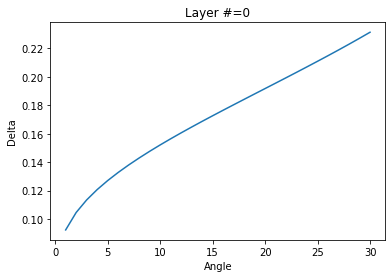

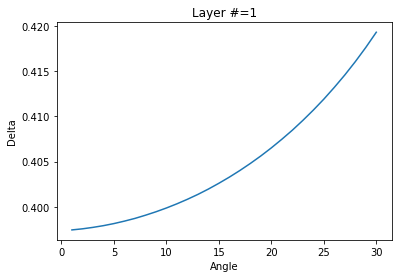

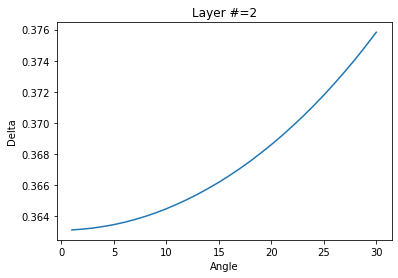

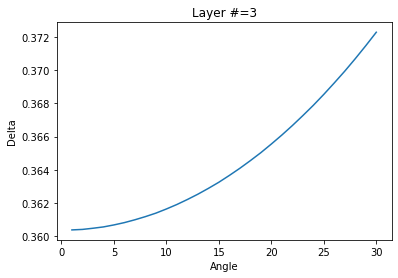

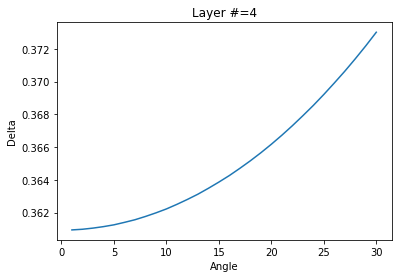

In [62]:
Sequential_angles_and_levels_of_symmetric_pairs_of_pants_Matrix_Method(angle_downlmt=1,angle_uplmt=31,incre=0.00001,NoL=5)